<a href="https://colab.research.google.com/github/desireesosa/EDP1/blob/main/EcuaciondeOnda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ecuación de Onda** \\
*Elaborar la solución completa de la ecuación de onda del Ejemplo 1 visto en clase. Elegir parámetros adecuados para k, c y L.* \\

**Ejercicio:** \\
Cuerda vibrante con deflexion inicial triangular: \\

$ f(x) = \left\{
\begin{array}{l}
      \frac{2K}{L}*X &  0<x<\frac{1}{2} \\
      \\
      \frac{2K}{L}(L-X) & \frac{L}{2}<x<L \\
\end{array}
\right.$

$g(x)=0$

Eligiendo parmetros adecuados para $K, L, C$

In [ ]:
#Programa que elabore la solucion completa de la ecuacion de onda del ejercicio.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#Parametros de k,l,c
L = 1.0  # Longitud de la cuerda
c = 1.0  # Velocidad de propagación
K = 1.0  # Altura máxima de la deflexión inicial

terms=100 #terminos de serie

*Definimos a la funcion:*

In [17]:
def f(x):
    if 0 < x < L / 2:
        return (2 * K / L) * x
    elif L / 2 < x < L:
        return (2 * K / L) * (L - x)
    else:
        return 0

#Coeficientes de fourier en f(x)
def A_n(n):
  if n % 2 == 0:
    return 0
  else:
    return (8/(n*np.pi)**2)*(-1)**((n-1)//2)

*Solucion de la ecuacion de
onda y creacion de malla de puntos*

In [18]:
def u(x, t):
    result = 0
    for n in range(1, terms + 1):
        # Call the a_n function with argument n instead of indexing into it
        result += A_n(n) * np.sin(n * np.pi * x / L) * np.cos(n * np.pi * c * t / L)
    return result
x = np.linspace(0, L, 100)
t = np.linspace(0, 2 * L / c, 50)  # Tiempo hasta que la onda regresa al inicio

# Calcular la solución para cada punto de la malla
U = np.zeros((len(t),len(x)))

for i, t_val in enumerate(t):
  for j, x_val in enumerate(x):
    U[i, j] = u(x_val, t_val)

*Visualizacion:*

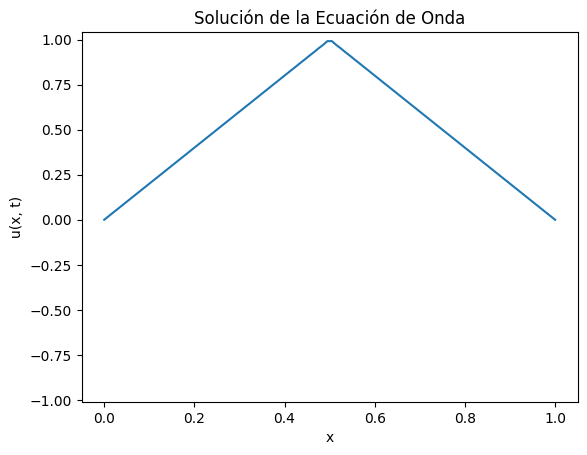

In [15]:
fig, ax = plt.subplots()
line, = ax.plot(x, U[0,:])
ax.set_ylim(-0.12,0.12)
ax.set_xlabel('x')
ax.set_ylabel('u(x, t)')
ax.set_title('Solución de la Ecuación de Onda')

def animate(i):
    line.set_ydata(U[i,:])
    return line,

ani = FuncAnimation(fig, animate, frames=len(t), interval=100, blit=True)

y_min, y_max = np.min(U), np.max(U)
ax.set_ylim(y_min - 0.05, y_max + 0.05)

plt.show()

*Imprimiendo resultados*

In [16]:
print("Solucion analitica de la ecuacion de onda:")
print("Los primeros 3 terminos NO nulos.")
for n in [1,3,5]:
  coeficiente=A_n(n)
  print(f"a_{n} = {A_n(n)}")
print("Los primeros 3 terminos nulos.")
for n in [2,4,6]:
  coeficiente=A_n(n)
  print(f"a_{n} = {A_n(n)}")

Solucion analitica de la ecuacion de onda:
Los primeros 3 terminos NO nulos.
a_1 = 0.8105694691387022
a_3 = -0.09006327434874468
a_5 = 0.03242277876554809
Los primeros 3 terminos nulos.
a_2 = 0
a_4 = 0
a_6 = 0
